In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv('sample_data/Cleaned_Laptop_data.csv')

# Data Cleaning
data = data.replace('Missing', np.nan).dropna()

# Convert numeric columns from strings to integers
data['ram_gb'] = data['ram_gb'].str.replace(' GB', '').astype(int)
data['ssd'] = data['ssd'].str.replace(' GB', '').astype(int)
data['hdd'] = data['hdd'].str.replace(' GB', '').astype(int)
data['latest_price'] = data['latest_price'].astype(int)
data['old_price'] = data['old_price'].astype(int)

# Encoding categorical variables
data['processor_brand'] = data['processor_brand'].astype('category').cat.codes
data['os'] = data['os'].astype('category').cat.codes
data['ram_type'] = data['ram_type'].astype('category').cat.codes


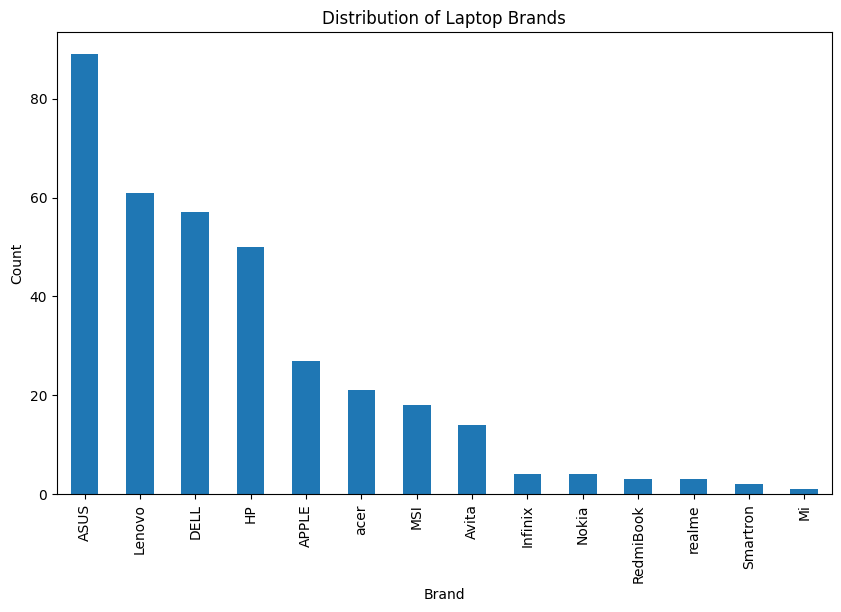

In [17]:
def plot_brand_distribution(data):
    plt.figure(figsize=(10, 6))
    data['brand'].value_counts().plot(kind='bar')
    plt.title('Distribution of Laptop Brands')
    plt.xlabel('Brand')
    plt.ylabel('Count')
    plt.show()

plot_brand_distribution(data)


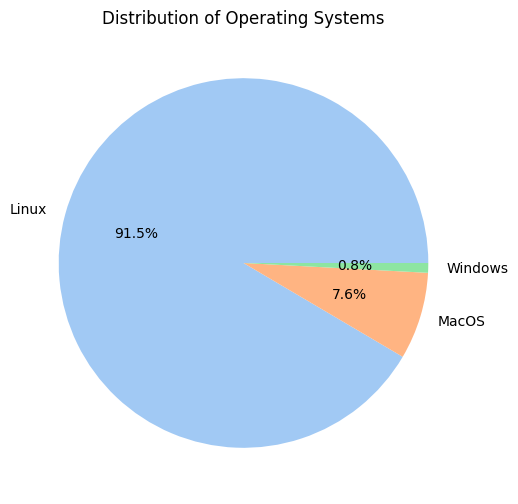

In [31]:
def plot_os_distribution(data):
    os_mapping = {0: 'Windows', 1: 'MacOS', 2: 'Linux'}
    data['os_name'] = data['os'].map(os_mapping)

    plt.figure(figsize=(10, 6))
    data['os_name'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels=data['os_name'].unique(), colors=sns.color_palette('pastel'))
    plt.title('Distribution of Operating Systems')
    plt.ylabel('')
    plt.show()

plot_os_distribution(data)


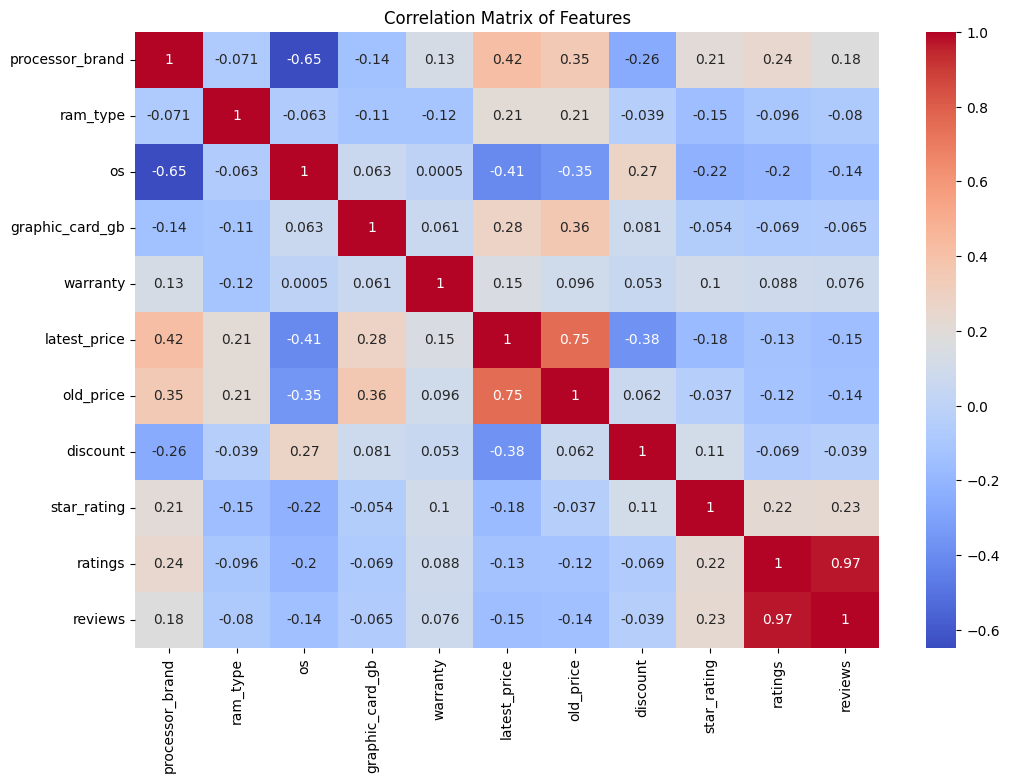

In [18]:
def plot_correlation_matrix(data):
    # Select only numeric columns for the correlation matrix
    numeric_data = data.select_dtypes(include=[np.number])
    plt.figure(figsize=(12, 8))
    sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix of Features')
    plt.show()

plot_correlation_matrix(data)


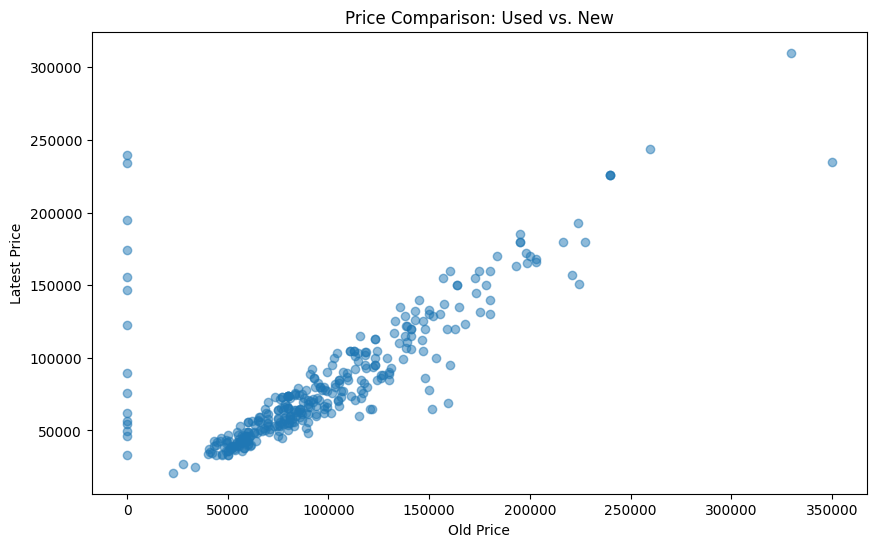

In [14]:
def plot_price_comparison(data):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['old_price'], data['latest_price'], alpha=0.5)
    plt.title('Price Comparison: Used vs. New')
    plt.xlabel('Old Price')
    plt.ylabel('Latest Price')
    plt.show()

plot_price_comparison(data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

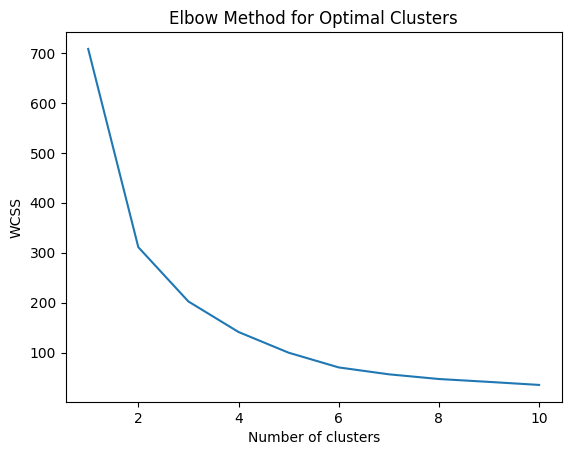

In [34]:
# Function for Optimal Number of Clusters using Elbow Method
def plot_elbow_method(data):
    scaler = StandardScaler()
    data[['normalized_used_price', 'normalized_new_price']] = scaler.fit_transform(data[['latest_price', 'old_price']])
    X = data[['normalized_used_price', 'normalized_new_price']]

    wcss = []
    for i in range(1, 11):
        kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)

    plt.plot(range(1, 11), wcss)
    plt.title('Elbow Method for Optimal Clusters')
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')
    plt.show()

plot_elbow_method(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


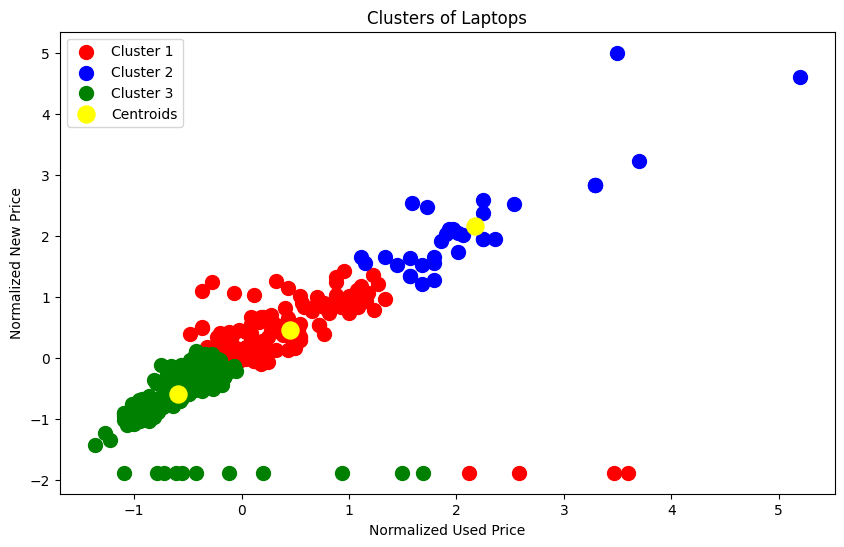

In [37]:
def plot_kmeans_clusters(data, n_clusters=3):
    # Standardizing the necessary columns
    scaler = StandardScaler()
    data[['normalized_used_price', 'normalized_new_price']] = scaler.fit_transform(data[['latest_price', 'old_price']])

    # Features for clustering
    X = data[['normalized_used_price', 'normalized_new_price']]

    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    y_kmeans = kmeans.fit_predict(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(X.values[y_kmeans == 0, 0], X.values[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
    plt.scatter(X.values[y_kmeans == 1, 0], X.values[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
    plt.scatter(X.values[y_kmeans == 2, 0], X.values[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='yellow', label='Centroids')
    plt.title('Clusters of Laptops')
    plt.xlabel('Normalized Used Price')
    plt.ylabel('Normalized New Price')
    plt.legend()
    plt.show()

# Call the function to generate the updated clustering plot
plot_kmeans_clusters(data)


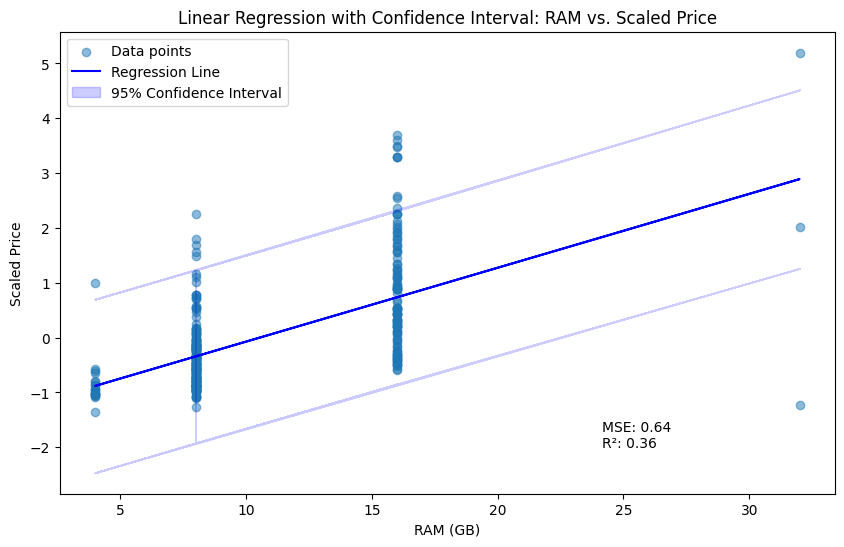

In [29]:
from sklearn.preprocessing import StandardScaler

def plot_ram_vs_price_with_confidence_scaled(data):
    scaler = StandardScaler()
    data['scaled_price'] = scaler.fit_transform(data[['latest_price']])

    X = data[['ram_gb']]
    y = data['scaled_price']

    # Add a constant to the model (required for statsmodels)
    X = sm.add_constant(X)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Predict values
    predictions = model.get_prediction(X)
    pred_summary = predictions.summary_frame(alpha=0.05)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(data['ram_gb'], y, alpha=0.5, label='Data points')
    plt.plot(data['ram_gb'], model.predict(X), color='blue', label='Regression Line')
    plt.fill_between(data['ram_gb'], pred_summary['obs_ci_lower'], pred_summary['obs_ci_upper'], color='blue', alpha=0.2, label='95% Confidence Interval')
    plt.title('Linear Regression with Confidence Interval: RAM vs. Scaled Price')
    plt.xlabel('RAM (GB)')
    plt.ylabel('Scaled Price')
    mse = mean_squared_error(y, model.predict(X))
    r2 = model.rsquared
    plt.text(0.7, 0.1, f'MSE: {mse:.2f}\nR²: {r2:.2f}', transform=plt.gca().transAxes)
    plt.legend()
    plt.show()

plot_ram_vs_price_with_confidence_scaled(data)


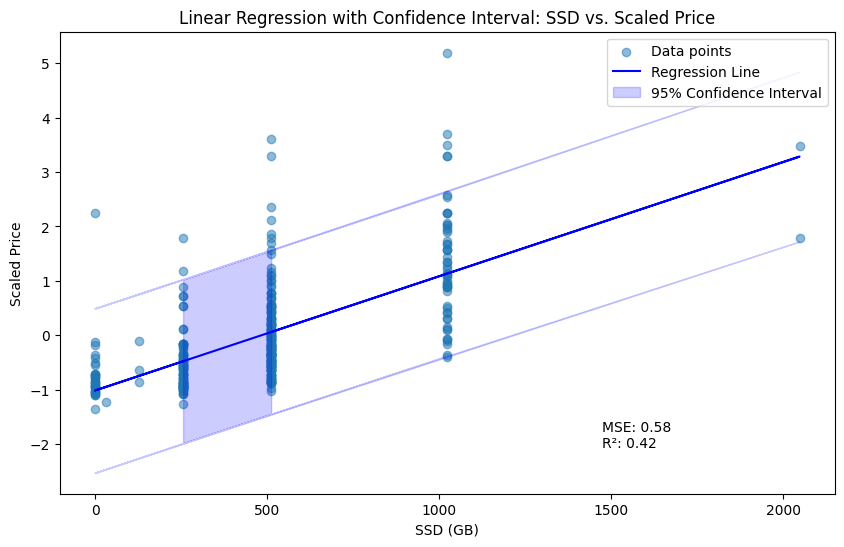

In [30]:
def plot_ssd_vs_price_with_confidence_scaled(data):
    scaler = StandardScaler()
    data['scaled_price'] = scaler.fit_transform(data[['latest_price']])

    X = data[['ssd']]
    y = data['scaled_price']

    # Add a constant to the model (required for statsmodels)
    X = sm.add_constant(X)

    # Fit the regression model
    model = sm.OLS(y, X).fit()

    # Predict values
    predictions = model.get_prediction(X)
    pred_summary = predictions.summary_frame(alpha=0.05)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(data['ssd'], y, alpha=0.5, label='Data points')
    plt.plot(data['ssd'], model.predict(X), color='blue', label='Regression Line')
    plt.fill_between(data['ssd'], pred_summary['obs_ci_lower'], pred_summary['obs_ci_upper'], color='blue', alpha=0.2, label='95% Confidence Interval')
    plt.title('Linear Regression with Confidence Interval: SSD vs. Scaled Price')
    plt.xlabel('SSD (GB)')
    plt.ylabel('Scaled Price')
    mse = mean_squared_error(y, model.predict(X))
    r2 = model.rsquared
    plt.text(0.7, 0.1, f'MSE: {mse:.2f}\nR²: {r2:.2f}', transform=plt.gca().transAxes)
    plt.legend()
    plt.show()

plot_ssd_vs_price_with_confidence_scaled(data)
